In [90]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        path=os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/poro-perm/poro_perm_data.csv


In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from scipy.stats import anderson
import pylab 
import scipy.stats as stats
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

## 1. Data Import and Cleaning

In [92]:
df=pd.read_csv(path)

In [93]:
df

,Depth (ft),Porosity (%),Permeability (mD),Facies
0,3526.5,9.526876,15.733116,'overbanks'
1,3638.0,21.271527,94.850556,'crevasse splay'
2,4020.0,26.812356,68.457613,'crevasse splay'
3,739.5,-0.388273,9.836162,'overbanks'
4,4226.0,45.077395,397.786445,'channel'
...,...,...,...,...
160,2091.0,40.773237,413.890340,'channel'
161,1291.0,18.473484,32.161080,'overbanks'
162,2826.0,25.629876,253.618050,'channel'
163,2026.5,40.174724,348.257560,'channel'


In [94]:
df.isnull().sum()

Depth (ft)           0
Porosity (%)         0
Permeability (mD)    0
Facies               3
dtype: int64

In [95]:
df['Facies'].fillna("channel",inplace=True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Depth (ft)         165 non-null    float64
 1   Porosity (%)       165 non-null    float64
 2   Permeability (mD)  165 non-null    float64
 3   Facies             165 non-null    object 
dtypes: float64(3), object(1)
memory usage: 5.3+ KB


<Axes: >

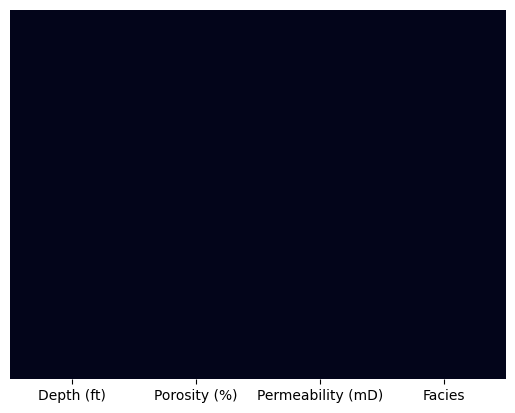

In [97]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [98]:
# Encode the 'Facies' column
label_encoder = LabelEncoder()
df['Facies_encoded'] = label_encoder.fit_transform(df['Facies'])
X = df[['Depth (ft)', 'Porosity (%)', 'Permeability (mD)']]
y = df['Facies_encoded']
reg = LinearRegression()
reg.fit(X, y)



LinearRegression()

In [99]:
df

,Depth (ft),Porosity (%),Permeability (mD),Facies,Facies_encoded
0,3526.5,9.526876,15.733116,'overbanks',2
1,3638.0,21.271527,94.850556,'crevasse splay',1
2,4020.0,26.812356,68.457613,'crevasse splay',1
3,739.5,-0.388273,9.836162,'overbanks',2
4,4226.0,45.077395,397.786445,'channel',0
...,...,...,...,...,...
160,2091.0,40.773237,413.890340,'channel',0
161,1291.0,18.473484,32.161080,'overbanks',2
162,2826.0,25.629876,253.618050,'channel',0
163,2026.5,40.174724,348.257560,'channel',0


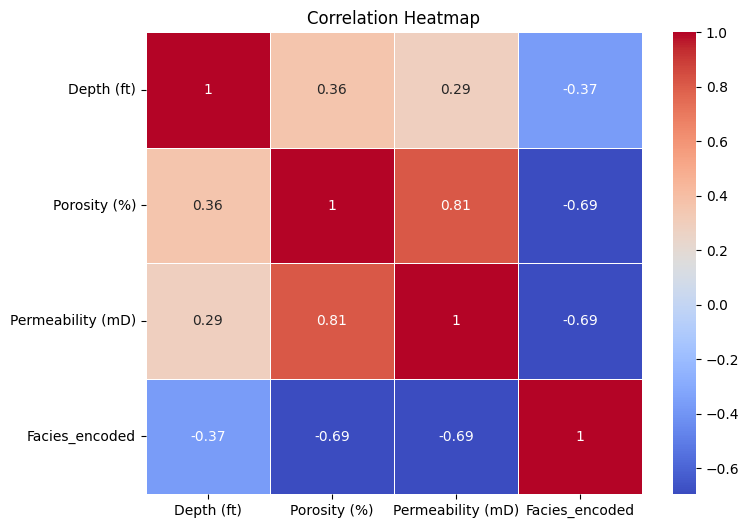

In [100]:
correlation_matrix = df.drop("Facies",axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



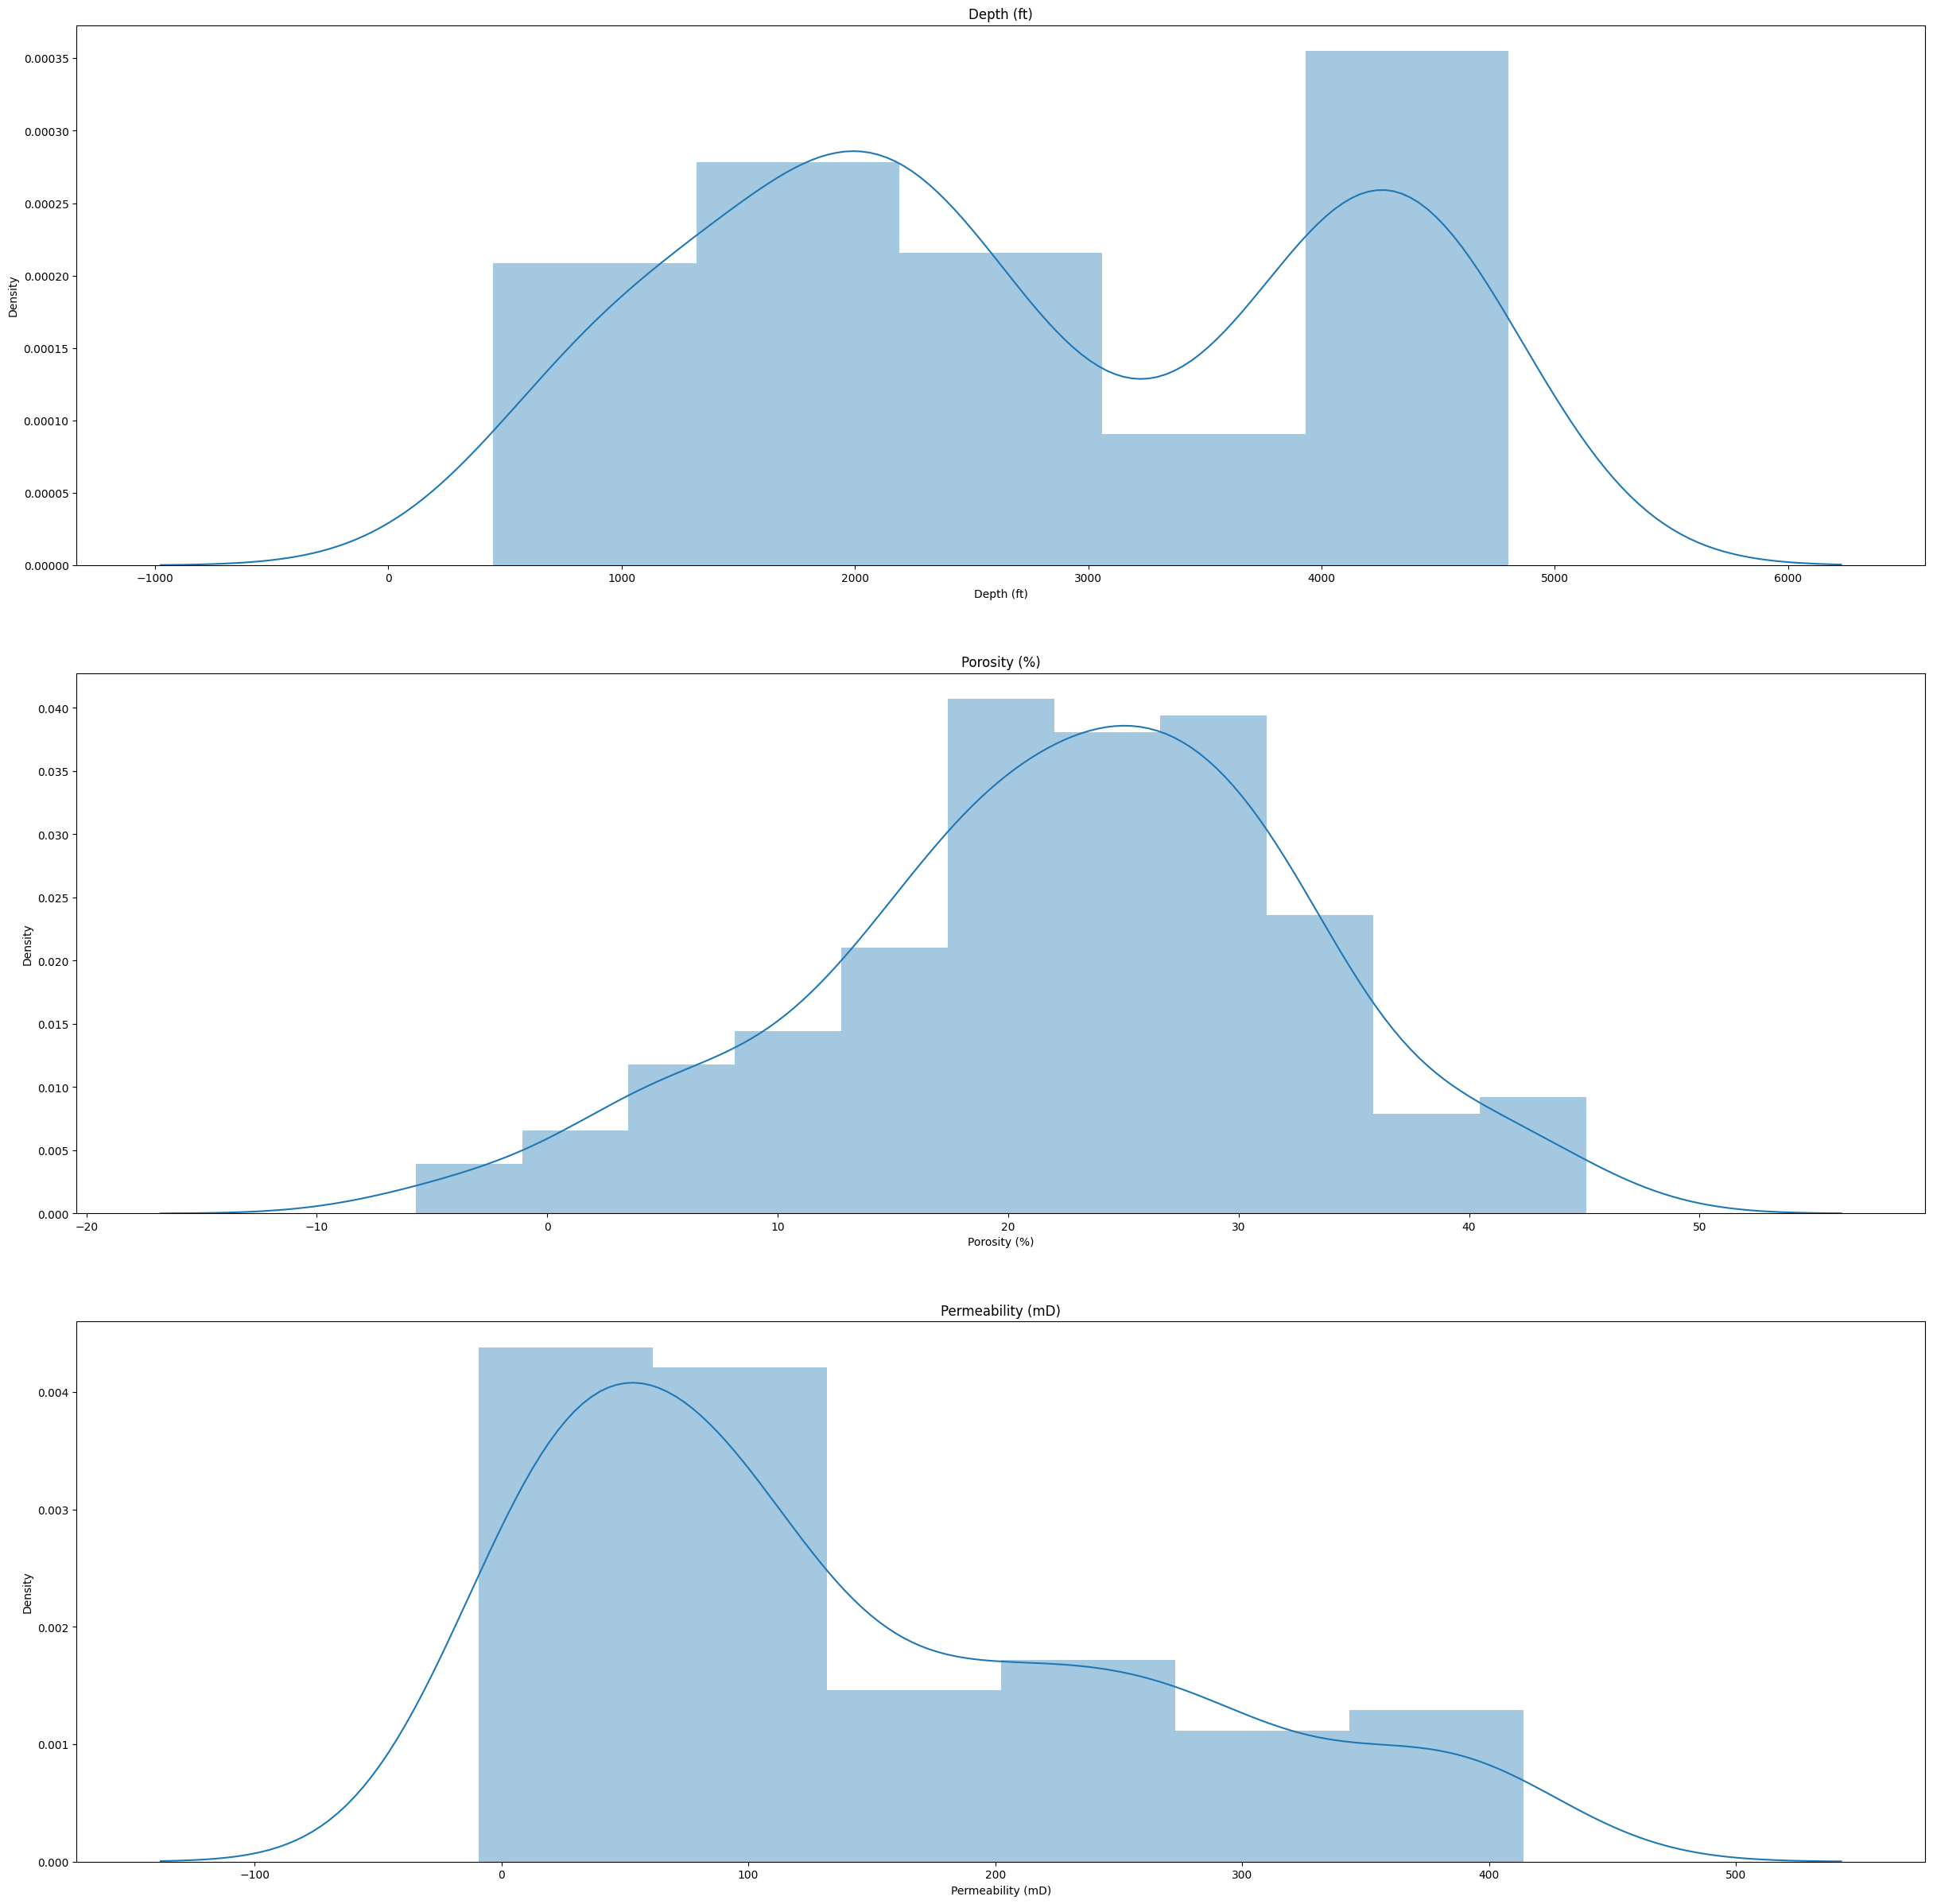

In [101]:
# Distplot to nsee the distribution
fig,axes=plt.subplots(nrows=3,ncols=1)
axes=axes.flatten()
fig.set_size_inches(30,30)
cols=list(df.select_dtypes(include=np.number).columns)
for ax,col in zip(axes,cols):
    print()
    sns.distplot(df[col],ax=ax)
    ax.set_title(col)

In [102]:
df.describe()

,Depth (ft),Porosity (%),Permeability (mD),Facies_encoded
count,165.000000,165.000000,165.000000,165.000000
mean,2736.096970,22.464188,138.312550,0.836364
std,1319.468672,10.246750,119.137635,0.850329
min,449.500000,-5.707354,-9.299637,0.000000
25%,1737.500000,16.006450,32.161080,0.000000
50%,2397.500000,23.884584,94.850556,1.000000
75%,4135.000000,29.647940,231.703844,2.000000
max,4802.000000,45.077395,413.890340,3.000000


1. min values of each column

In [103]:
cols=list(df.select_dtypes(include=np.number).columns)
for col in cols:
    minn=min(df[col])
    print(f"Min value in column {col} is ", minn)

Min value in column Depth (ft) is  449.5
Min value in column Porosity (%) is  -5.707354014
Min value in column Permeability (mD) is  -9.299636871
Min value in column Facies_encoded is  0


2. max values of each column

In [104]:
cols=list(df.select_dtypes(include=np.number).columns)

for col in cols:
    maxx=max(df[col])
    print(f"Max value in column {col} is ", maxx)

Max value in column Depth (ft) is  4802.0
Max value in column Porosity (%) is  45.07739488
Max value in column Permeability (mD) is  413.8903399
Max value in column Facies_encoded is  3


2. Avg values of each column

In [105]:
cols=list(df.select_dtypes(include=np.number).columns)

for col in cols:
    avg=0
    for val in df[col]:
        avg+=val
    avg/=len(df[col])
    print(f"Mean value in column {col} is ", avg)

Mean value in column Depth (ft) is  2736.0969696969696
Mean value in column Porosity (%) is  22.464188272193944
Mean value in column Permeability (mD) is  138.3125504057819
Mean value in column Facies_encoded is  0.8363636363636363


Mode

In [106]:
cols=list(df.select_dtypes(include=np.number).columns)

mode=0
for col in cols:
    mode=df[col].mode()[0]
    print(f"Mode for the column {col} is: ",mode)

Mode for the column Depth (ft) is:  1814.0
Mode for the column Porosity (%) is:  -5.707354014
Mode for the column Permeability (mD) is:  0.0
Mode for the column Facies_encoded is:  0


Median'


In [107]:
cols=list(df.select_dtypes(include=np.number).columns)

median=0
for col in cols:
    median=df[col].median()
    print(f"Median for the column {col} is: ",median)

Median for the column Depth (ft) is:  2397.5
Median for the column Porosity (%) is:  23.88458425
Median for the column Permeability (mD) is:  94.85055552
Median for the column Facies_encoded is:  1.0


Standard Deviation

In [108]:
cols=list(df.select_dtypes(include=np.number).columns)

std=0
for col in cols:
    std=df[col].std()
    print(f"Standard Deviation for the column {col} is: ",std)

Standard Deviation for the column Depth (ft) is:  1319.4686718165747
Standard Deviation for the column Porosity (%) is:  10.246750323951753
Standard Deviation for the column Permeability (mD) is:  119.13763480760255
Standard Deviation for the column Facies_encoded is:  0.8503292697316175



Variance|

In [109]:
cols=list(df.select_dtypes(include=np.number).columns)

var=0
for col in cols:
    std=df[col].std()
    var=std**2
    print(f"Variance for the column {col} is: ",var)

Variance for the column Depth (ft) is:  1740997.5759053957
Variance for the column Porosity (%) is:  104.99589220140535
Variance for the column Permeability (mD) is:  14193.776027549671
Variance for the column Facies_encoded is:  0.7230598669623058


As we have seen there are NULL values so either we can remove them or we can impute them

In [110]:
df.isnull().sum()

Depth (ft)           0
Porosity (%)         0
Permeability (mD)    0
Facies               0
Facies_encoded       0
dtype: int64

In [111]:
df['Facies'].value_counts()

Facies
'channel'           72
'crevasse splay'    51
'overbanks'         39
channel              3
Name: count, dtype: int64

We are imputing the most frequent categorical value

In [112]:
df.isnull().sum()

Depth (ft)           0
Porosity (%)         0
Permeability (mD)    0
Facies               0
Facies_encoded       0
dtype: int64

Now we will plot the columns

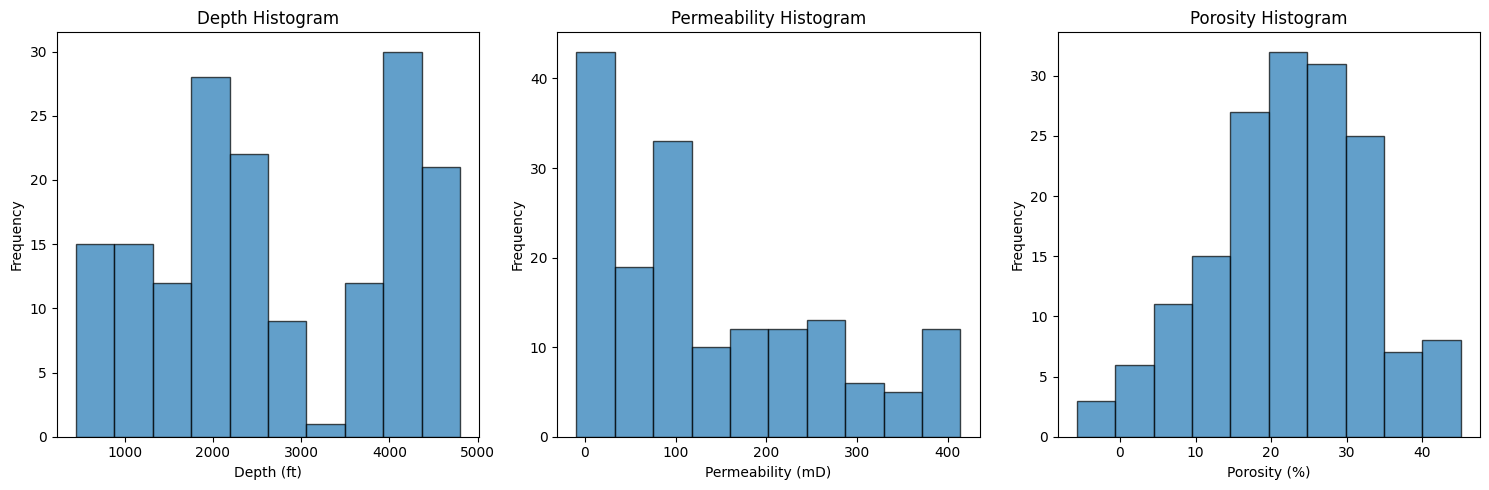

In [113]:
## Hist plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.hist(df['Depth (ft)'], bins=10, edgecolor='black', alpha=0.7)
ax1.set_xlabel('Depth (ft)')
ax1.set_ylabel('Frequency')
ax1.set_title('Depth Histogram')

ax2.hist(df['Permeability (mD)'], bins=10, edgecolor='black', alpha=0.7)
ax2.set_xlabel('Permeability (mD)')
ax2.set_ylabel('Frequency')
ax2.set_title('Permeability Histogram')

ax3.hist(df['Porosity (%)'], bins=10, edgecolor='black', alpha=0.7)
ax3.set_xlabel('Porosity (%)')
ax3.set_ylabel('Frequency')
ax3.set_title('Porosity Histogram')

plt.tight_layout()

plt.show()



Removing the outliers using the Inter Quantile Range
Sort your data from low to high

Identify the first quartile (Q1), the median, and the third quartile (Q3).

Calculate your IQR = Q3 – Q1

Calculate your upper fence = Q3 + (1.5 * IQR)

Calculate your lower fence = Q1 – (1.5 * IQR)

Use your fences to highlight any outliers, all values that fall outside your fences.

In [114]:
cols=list(df.select_dtypes(include=np.number).columns)

for col in cols:
    q3=df[col].quantile(0.3)
    q1=df[col].quantile(0.1)
    iqr=q3-q1
    ul=q3+(1.5*iqr)
    ll=q1-(1.5*iqr)
    df=df[df[col]>=ll]
    df=df[df[col]<=ul]

In [115]:
df

,Depth (ft),Porosity (%),Permeability (mD),Facies,Facies_encoded
3,739.5,-0.388273,9.836162,'overbanks',2
12,843.5,14.155770,30.844788,'overbanks',2
14,540.5,-2.939126,-9.299637,'overbanks',2
23,763.0,6.081342,22.135841,'overbanks',2
31,782.5,16.006450,33.469007,'overbanks',2
34,1804.5,9.611012,19.271893,'overbanks',2
48,1359.0,-5.707354,5.395187,'overbanks',2
49,838.5,14.142863,27.368818,'overbanks',2
51,2174.0,18.827628,35.712632,'overbanks',2
52,842.5,14.317292,20.411508,'overbanks',2


In [116]:
df['Facies'].value_counts().index

Index([''overbanks'', ''channel'', ''crevasse splay''], dtype='object', name='Facies')

In [118]:
df

,Depth (ft),Porosity (%),Permeability (mD),Facies,Facies_encoded
3,739.5,-0.388273,9.836162,'overbanks',2
12,843.5,14.155770,30.844788,'overbanks',2
14,540.5,-2.939126,-9.299637,'overbanks',2
23,763.0,6.081342,22.135841,'overbanks',2
31,782.5,16.006450,33.469007,'overbanks',2
34,1804.5,9.611012,19.271893,'overbanks',2
48,1359.0,-5.707354,5.395187,'overbanks',2
49,838.5,14.142863,27.368818,'overbanks',2
51,2174.0,18.827628,35.712632,'overbanks',2
52,842.5,14.317292,20.411508,'overbanks',2


## 2. Data Visualization

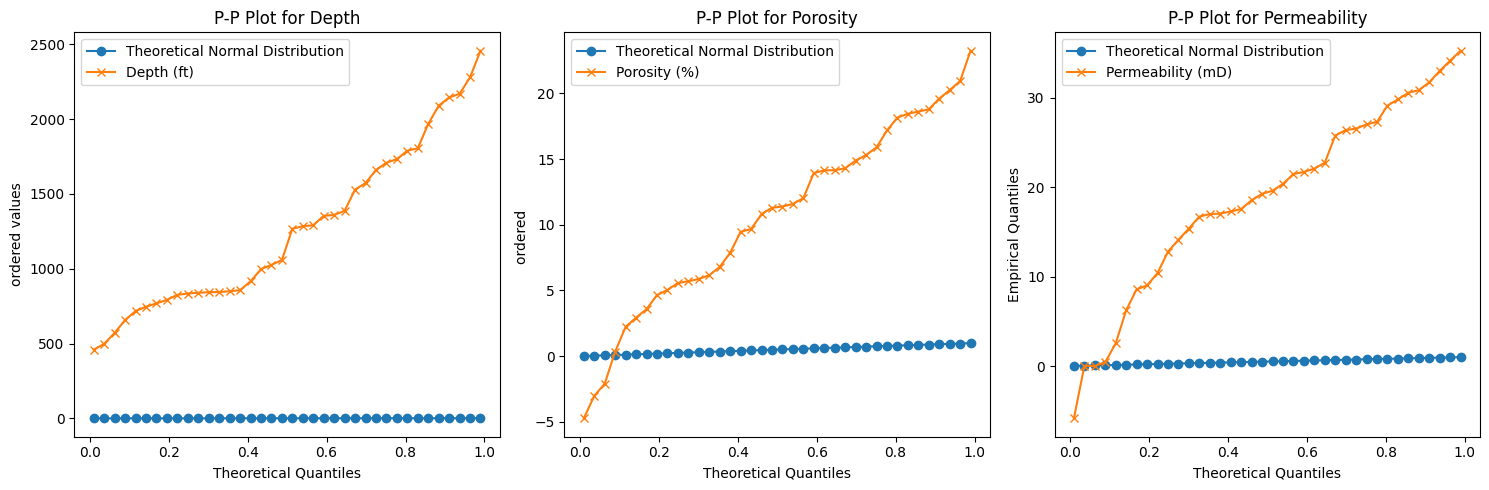

In [119]:
normal_quantiles = np.linspace(0.01, 0.99, len(df))

data_quantiles_depth = df['Depth (ft)'].quantile(normal_quantiles)
data_quantiles_porosity = df['Porosity (%)'].quantile(normal_quantiles)
data_quantiles_permeability = df['Permeability (mD)'].quantile(normal_quantiles)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.plot(normal_quantiles, normal_quantiles, marker='o', linestyle='-', label='Theoretical Normal Distribution')
ax1.plot(normal_quantiles, data_quantiles_depth, marker='x', linestyle='-', label='Depth (ft)')
ax1.set_xlabel('Theoretical Quantiles')
ax1.set_ylabel('ordered values')
ax1.set_title('P-P Plot for Depth')
ax1.legend()

ax2.plot(normal_quantiles, normal_quantiles, marker='o', linestyle='-', label='Theoretical Normal Distribution')
ax2.plot(normal_quantiles, data_quantiles_porosity, marker='x', linestyle='-', label='Porosity (%)')
ax2.set_xlabel('Theoretical Quantiles')
ax2.set_ylabel('ordered ')
ax2.set_title('P-P Plot for Porosity')
ax2.legend()

ax3.plot(normal_quantiles, normal_quantiles, marker='o', linestyle='-', label='Theoretical Normal Distribution')
ax3.plot(normal_quantiles, data_quantiles_permeability, marker='x', linestyle='-', label='Permeability (mD)')
ax3.set_xlabel('Theoretical Quantiles')
ax3.set_ylabel('Empirical Quantiles')
ax3.set_title('P-P Plot for Permeability')
ax3.legend()

plt.tight_layout()

plt.show()

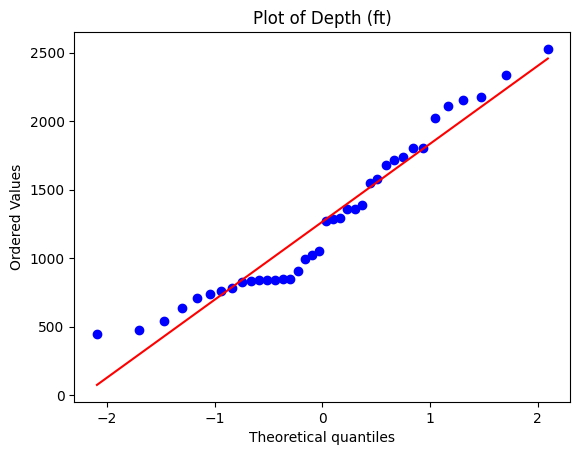

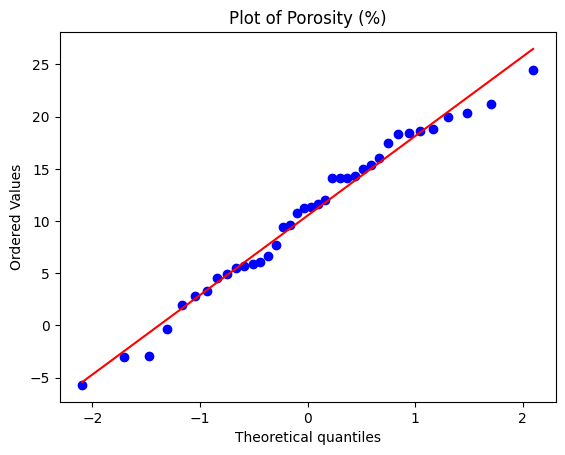

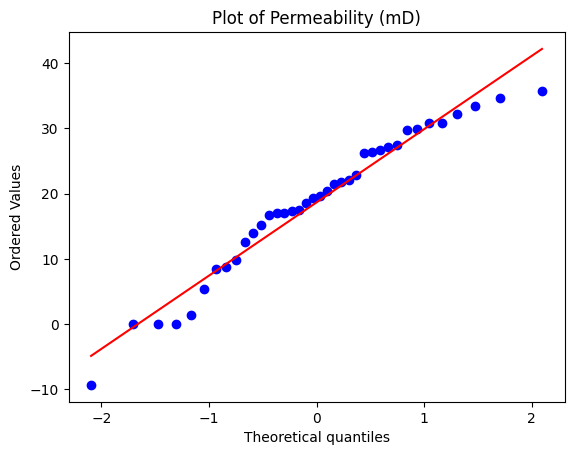

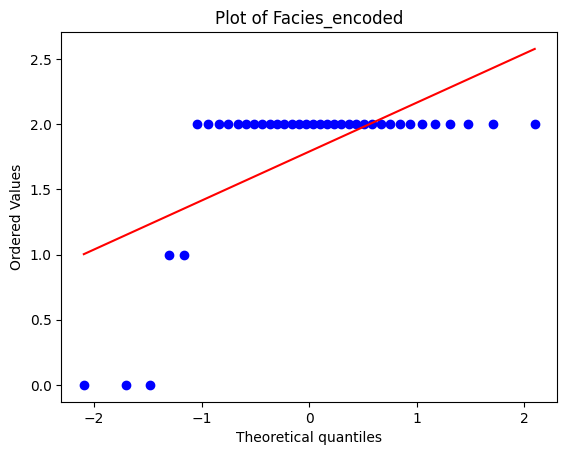

In [120]:
cols=list(df.select_dtypes(include=np.number).columns)

for col in cols:
    stats.probplot(df[col], dist="norm", plot=pylab)
   
    plt.title(f'Plot of {col}')
    pylab.show()


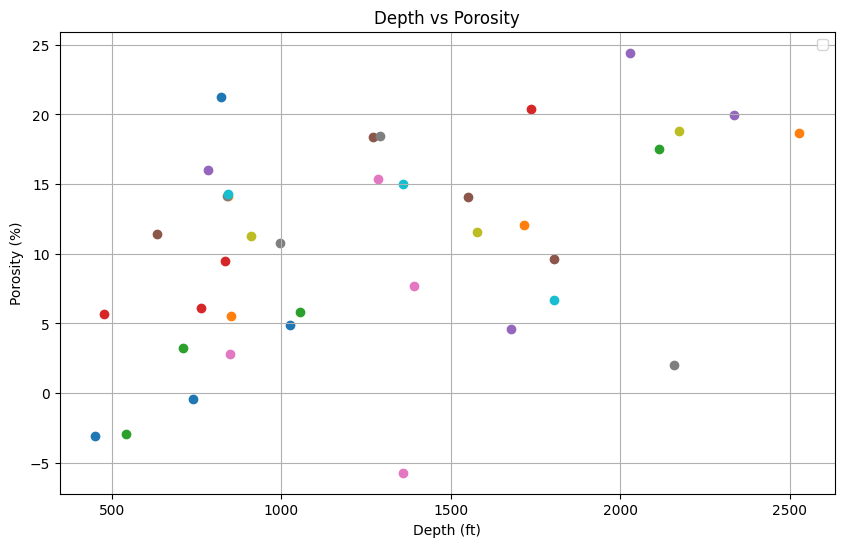

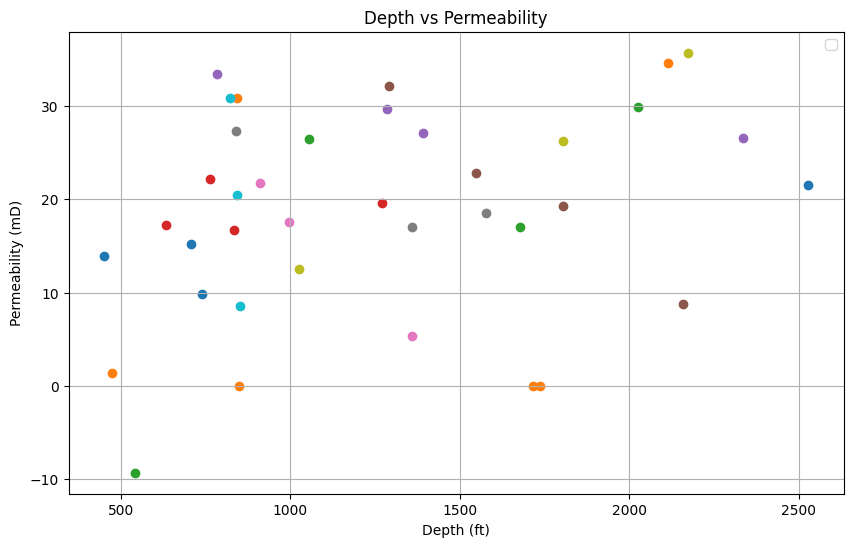

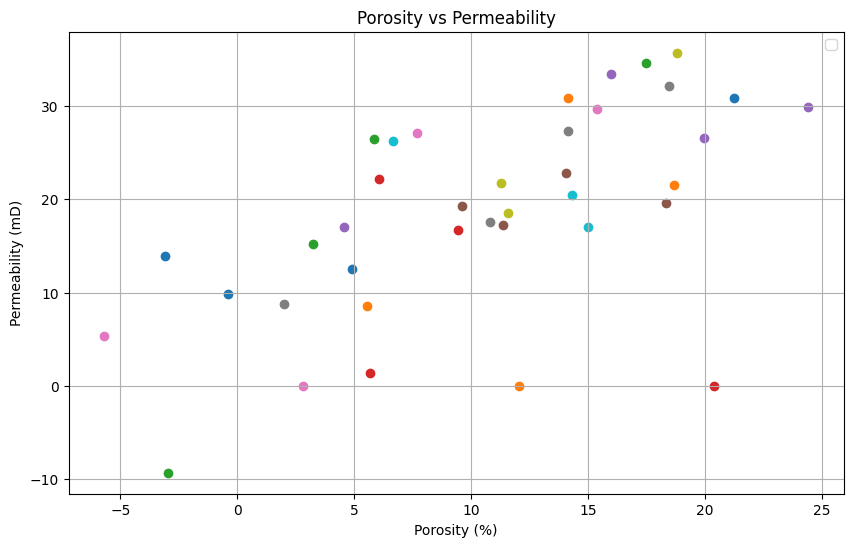

In [121]:
plt.figure(figsize=(10, 6))
for porosity in df['Porosity (%)'].unique():
    data = df[df['Porosity (%)'] == porosity]
    plt.scatter(data['Depth (ft)'], data['Porosity (%)'], marker='o')

plt.xlabel('Depth (ft)')
plt.ylabel('Porosity (%)')
plt.title('Depth vs Porosity')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 6))
for permeability in df['Permeability (mD)'].unique():
    data = df[df['Permeability (mD)'] == permeability]
    plt.scatter(data['Depth (ft)'], data['Permeability (mD)'], marker='o')

plt.xlabel('Depth (ft)')
plt.ylabel('Permeability (mD)')
plt.title('Depth vs Permeability')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 6))
for porosity in df['Porosity (%)'].unique():
    data = df[df['Porosity (%)'] == porosity]
    plt.scatter(data['Porosity (%)'], data['Permeability (mD)'],  marker='o')

plt.xlabel('Porosity (%)')
plt.ylabel('Permeability (mD)')
plt.title('Porosity vs Permeability')
plt.legend()
plt.grid(True)



## 3. Data analysis

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [123]:
df.drop("Facies",axis=1,inplace=True)
df

,Depth (ft),Porosity (%),Permeability (mD),Facies_encoded
3,739.5,-0.388273,9.836162,2
12,843.5,14.155770,30.844788,2
14,540.5,-2.939126,-9.299637,2
23,763.0,6.081342,22.135841,2
31,782.5,16.006450,33.469007,2
34,1804.5,9.611012,19.271893,2
48,1359.0,-5.707354,5.395187,2
49,838.5,14.142863,27.368818,2
51,2174.0,18.827628,35.712632,2
52,842.5,14.317292,20.411508,2


In [124]:
X=df.drop("Facies_encoded",axis=1)

In [125]:
Y=df['Facies_encoded']

In [126]:
ss=StandardScaler()
X=ss.fit_transform(X)

In [127]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=40)

In [128]:
model=KMeans()

In [129]:
model.fit(X_train,Y_train)

KMeans()

In [130]:
model.score(X_test,Y_test)

-11.94656330779241

In [133]:
import pandas as pd
import numpy as np




# Linear Regression
X = df.drop('Facies_encoded', axis=1)
y = df['Facies_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, linear_predictions)
print(f"Linear Regression Mean Squared Error: {mse_linear}")

# K-Means Clustering
kmeans_model = KMeans(n_clusters=len(df['Facies_encoded'].unique()), random_state=42)
kmeans_model.fit(X)
df['Cluster'] = kmeans_model.labels_

# Artificial Neural Networks (ANNs)
ann_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)
ann_predictions = ann_model.predict(X_test)

accuracy_ann = accuracy_score(y_test, ann_predictions)
print(f"ANN Accuracy: {accuracy_ann}")

# Anderson-Darling Test for Normality
for col in X.columns:
    _, p_value, _ = anderson(df[col])
    print(f"AD Test p-value for {col}: {p_value}")

# Remove the 'Cluster' column added for K-Means clustering
df = df.drop('Cluster', axis=1)


Linear Regression Mean Squared Error: 0.046207371476956915
ANN Accuracy: 0.875
AD Test p-value for Depth (ft): [0.529 0.603 0.723 0.844 1.004]
AD Test p-value for Porosity (%): [0.529 0.603 0.723 0.844 1.004]
AD Test p-value for Permeability (mD): [0.529 0.603 0.723 0.844 1.004]
